***
<p align="right">
      <img src="https://www.dkrz.de/@@site-logo/dkrz.svg" width="12%" align="right" title="DKRZlogo" hspace="20">
      <img src="https://wr.informatik.uni-hamburg.de/_media/logo.png" width="12%" align="right" title="UHHLogo">
</p>
<div style="font-size: 20px" align="center"><b> Python Course for Geoscientists, 9-12 October 2023</b></div>
<div style="font-size: 15px" align="center">
    <b>see also <a href="https://gitlab.dkrz.de/pythoncourse/material">https://gitlab.dkrz.de/pythoncourse/material</a></b>
</div>

***


<p align="center">
      <img src="https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png" width="35%" align="right" title="Xarraylogo" hspace="20">
</p>

<font size="20"> Xarray Introduction II</font> 

Xarray home page: https://xarray.pydata.org/en/stable/index.html <br>
Xarray documentation: https://docs.xarray.dev/en/stable/index.html


# How to create a Xarray DataSet with two 3D data variables 

## Importing required libraries

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os, datetime

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Define your fake data

as lists for the coordinate variables of time, lat, lon

In [3]:
time = ['2023-01-01', '2023-01-02']
lat  = [45.,50.,55.,60.]
lon  = [0.,5.,10.,15.,20.]

create some random 3D numpy ndarray representing your dummy data

In [4]:
mydata1 = np.random.uniform(250,300,40).reshape((len(time),len(lat),len(lon)))

check the shape of your dummy data

In [5]:
mydata1.shape

(2, 4, 5)

### Create the first xarray DataArray (i.e. the first variable)

This is done by converting the ndarray dummy data plus the coordinate variables into an xarray DataArray.    
Coordinates are added as dictionary in a key:value manner

In [6]:
da1 = xr.DataArray(data=mydata1,
                   coords={'time':  time,
                           'lat':   lat,
                           'lon':   lon,
                           },
                   attrs={'units': 'K', 'standard_name':'air_temperature'})

#### Check the DataArray by printing

In [7]:
da1

<xarray.DataArray (time: 2, lat: 4, lon: 5)>
array([[[259.54771147, 287.79300475, 273.23872771, 277.81057719,
         296.94889103],
        [298.48222016, 255.71772426, 262.69502263, 253.64049878,
         283.23928671],
        [259.58939018, 295.01377033, 285.49692106, 289.43626734,
         294.16049179],
        [297.55400187, 283.94698446, 263.89260139, 256.2365657 ,
         265.36061782]],

       [[289.33949126, 269.8296674 , 272.94313283, 264.27327447,
         252.47647744],
        [252.83751751, 291.40931598, 264.91050538, 274.67799245,
         286.53445775],
        [265.56320542, 260.42596007, 282.87354414, 255.01968352,
         268.89921696],
        [256.39211198, 294.18258954, 254.32094489, 282.52222996,
         269.30198721]]])
Coordinates:
  * time     (time) <U10 '2023-01-01' '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    units:          K
    standard_name:  air_temperature

#### check the first time step of the data by plotting

For 2D data, the default figure type of the plot() method is a pcolormesh.  
In this case, the output of plot() and plot.pcolormesh() is identical. 
see https://docs.xarray.dev/en/stable/generated/xarray.DataArray.plot.html

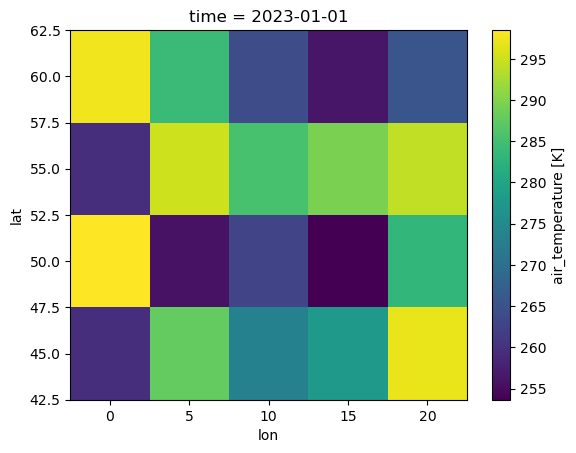

In [8]:
da1.isel(time=0).plot();         

#-- the plot() method offers many configurations options of the plot, e.g. cmap="Blues"
#da1.isel(time=0,lat=slice(1,4)).plot(cmap="Blues")

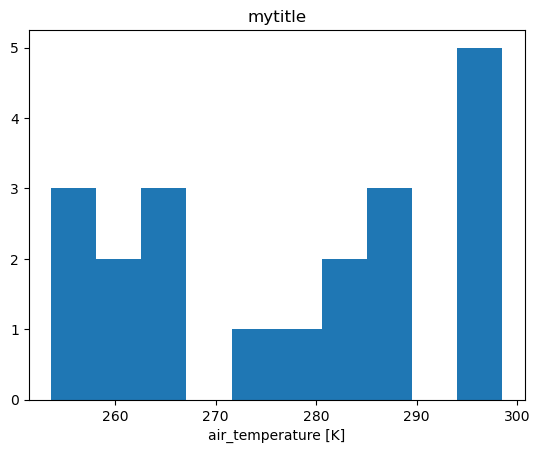

In [9]:
# you can also plot a histogram
da1.isel(time=0).plot.hist();
plt.title('mytitle');

you can also plot 2D data as a line plot with the plot.line() method, provided you specifiy one dimension as either x or y, which are then used as an axis of the line plot. 


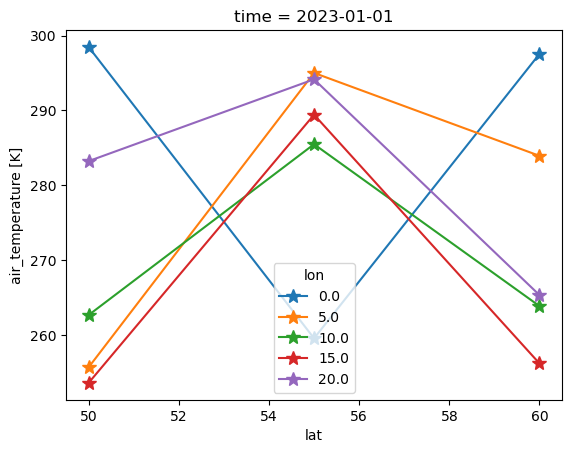

In [10]:
da1.isel(time=0,lat=slice(1,4)).plot.line(x="lat",marker='*',markersize=10);

### Create the second xarray DataArray (i.e. the second variable)

In [11]:
#-- create a new DataArray by inheriting the attributes, dims, coords from da1
da2 = da1.copy(data=mydata1**2)

In [12]:
#-- overwrite the standard name inherited from da1
da2.attrs["standard_name"] = "canopy_temperature"

### Convert the DataArrays into a DataSet

In [13]:
# it is mandatory to specify a name for each DataArray
ds = xr.Dataset({'airtemp': da1, 'cantemp': da2})

### Look at the DataSet

In [14]:
ds

<xarray.Dataset>
Dimensions:  (time: 2, lat: 4, lon: 5)
Coordinates:
  * time     (time) <U10 '2023-01-01' '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    airtemp  (time, lat, lon) float64 259.5 287.8 273.2 ... 254.3 282.5 269.3
    cantemp  (time, lat, lon) float64 6.737e+04 8.282e+04 ... 7.252e+04

### Edit the global metadata

this is the metadata describing the entire dataset. For example, add the CF conventions, if you want to write out CF-compliant netCDF files in the end. In addition, it is advisable to add a title, a history, institution, references, etc. See also https://cfconventions.org/Data/cf-conventions/cf-conventions-1.10/cf-conventions.html section 2.6.2.

In [15]:
ds.attrs={"Conventions": "CF-1.10", 
          "title": "this is just fake data for python course",
          "institution": "German Climate Computing Center (DKRZ)"}

In [16]:
ds

<xarray.Dataset>
Dimensions:  (time: 2, lat: 4, lon: 5)
Coordinates:
  * time     (time) <U10 '2023-01-01' '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Data variables:
    airtemp  (time, lat, lon) float64 259.5 287.8 273.2 ... 254.3 282.5 269.3
    cantemp  (time, lat, lon) float64 6.737e+04 8.282e+04 ... 7.252e+04
Attributes:
    Conventions:  CF-1.10
    title:        this is just fake data for python course
    institution:  German Climate Computing Center (DKRZ)

In [17]:
#-- you can also edit the metadata afterwards
ds.lat.attrs={"standard_name": "latitude", "units": "degrees_north"} 

----

## Xarray functions/methods


<br>

### `where` - to mask data

Similar to the NumPy `where` function, Xarray provides a `where` function that uses a condition to filter data. You can, e.g. filter the data by data value range or by a condition related to a dimension.


In [18]:
# For simplicity, we extract the data of interest from the Dataset prior the masking

In [19]:
var = ds["airtemp"].sel(time="2023-01-02")

### Filter data by data range using combined condition

In [20]:
mask1 = var.where((var > 273.15) & (var < 300.))
mask1

<xarray.DataArray 'airtemp' (lat: 4, lon: 5)>
array([[289.33949126,          nan,          nan,          nan,
                 nan],
       [         nan, 291.40931598,          nan, 274.67799245,
        286.53445775],
       [         nan,          nan, 282.87354414,          nan,
                 nan],
       [         nan, 294.18258954,          nan, 282.52222996,
                 nan]])
Coordinates:
    time     <U10 '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0
Attributes:
    units:          K
    standard_name:  air_temperature

In [21]:
mask1.dtype

dtype('float64')

--> the masked data have the same shape as the original data  
--> The masked data are of type float4 (mask1.dtype). The masked values are represented as nan. 

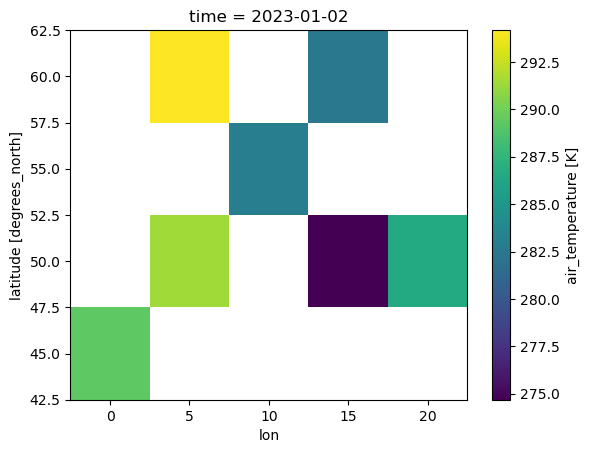

In [22]:
mask1.plot();

BUT: for using one mask as another mask, you need a bolean mask

In [23]:
mask2 = (var >= 280)
mask2

<xarray.DataArray 'airtemp' (lat: 4, lon: 5)>
array([[ True, False, False, False, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False],
       [False,  True, False,  True, False]])
Coordinates:
    time     <U10 '2023-01-02'
  * lat      (lat) float64 45.0 50.0 55.0 60.0
  * lon      (lon) float64 0.0 5.0 10.0 15.0 20.0

Example: Mask out ds['cantemp'] with mask2 and plot

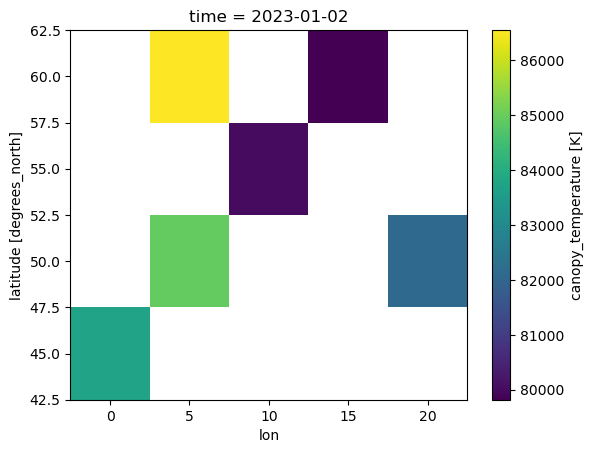

In [24]:
ds['cantemp'].sel(time="2023-01-02").where(mask2, drop=True).plot()

### Filter by a condition related to a dimension

In [25]:
vartmp= var.where(var.lon > 10.)
#vartmp.plot();

<br>

### `isnull` - check where missing values exist

It returns a mask of True/False elements. 

Our _var_ variable does not contain missing values. We now define values below 273.15 as missing.


In [26]:
var = var.where(var < 273.15)

In [27]:
#-- to count the missings: count()
print(var.isnull().count().values)     

20


<br>

### `count` - count valid values


Count the data that are not missing values.

In [28]:
var.count().values    #-- with .values, the output will be printed as xarray DataArray 

array(13)

### `notnull` - check where valid ("non-missing") values

To check where valid  ("non-missing") values are present, use `notnull`.


In [29]:
var.notnull().values

array([[False,  True,  True,  True,  True],
       [ True, False,  True, False, False],
       [ True,  True, False,  True,  True],
       [ True, False,  True, False,  True]])

<br>

### `fillna` - change missing value to a constant number

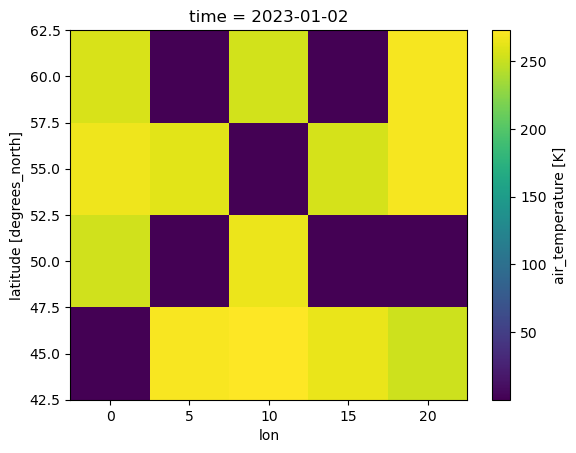

In [30]:
var.fillna(0.01).plot();

<br>

### `min(), max(), mean(), sum(), std(), corr(), ...`

Xarray provides a lot of computational functions.


In [31]:
print(f'min = {ds.airtemp.min().values:6.2f},  max = {ds.airtemp.max().values:6.2f}')

min = 252.48,  max = 298.48


In [32]:
print(f'std = {ds.airtemp.std().values:6.2f}')

std =  14.83


<br>

# Exercise 1

Use the precip data from the ../data/rectilinear_grid_2D.nc file:

1. compute the mean of the variable precip over 'time' and plot it
1. plot only the precip data > 0.0001
1. count how many non-missing values exist after masking values <=0.0001)
1. for the variable precip, compute the field mean, i.e. the mean over ('lat','lon') 
1. plot the field mean as timeseries line plot and add a centered title


In [80]:
# 1.

In [81]:
# 2.

In [82]:
# 3.

In [83]:
# 4.

In [84]:
# 5.

<br>

## Solution Exercise 1


In [64]:
# 1. 
ds2 = xr.open_dataset('../data/rectilinear_grid_2D.nc')
ds2

<xarray.Dataset>
Dimensions:  (lon: 192, lat: 96, time: 40)
Coordinates:
  * lon      (lon) float64 -180.0 -178.1 -176.2 -174.4 ... 174.4 176.2 178.1
  * lat      (lat) float64 88.57 86.72 84.86 83.0 ... -83.0 -84.86 -86.72 -88.57
  * time     (time) datetime64[ns] 2001-01-01 ... 2001-01-10T18:00:00
Data variables:
    tsurf    (time, lat, lon) float32 ...
    precip   (time, lat, lon) float32 ...
    u10      (time, lat, lon) float32 ...
    v10      (time, lat, lon) float32 ...
    qvi      (time, lat, lon) float32 ...
    slp      (time, lat, lon) float32 ...

In [65]:
ds2m = ds2.precip.mean('time')

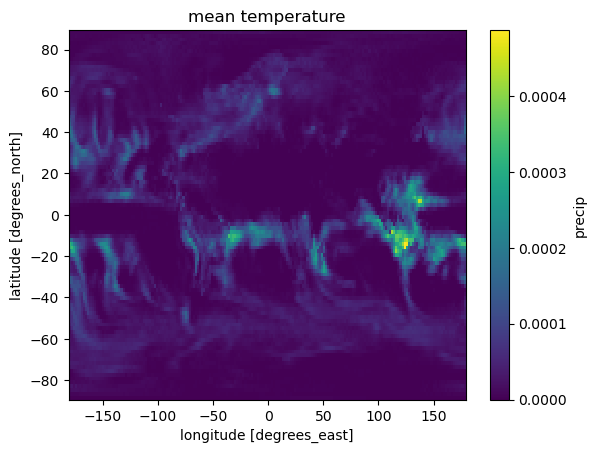

In [66]:
ds2m.plot();
plt.title("mean temperature");

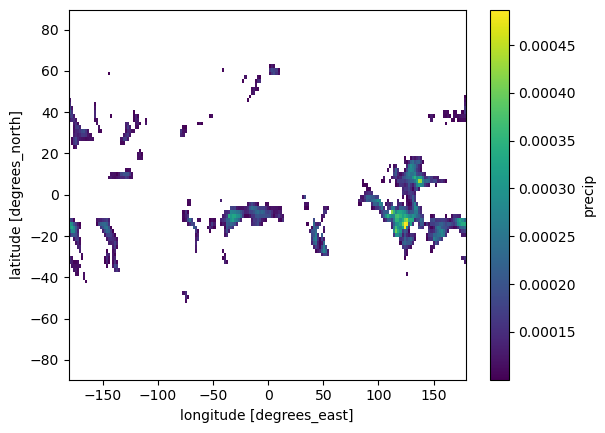

In [67]:
# 2.

ds2m.where(ds2m > 0.0001).plot();     #-- to subset region: xlim=50, ylim=0

In [62]:
# 3.

print(ds2m.where(ds2m > 0.0001).count().values)

1063


In [86]:
# 4.

ds2fm = ds2.precip.mean(('lat','lon'))

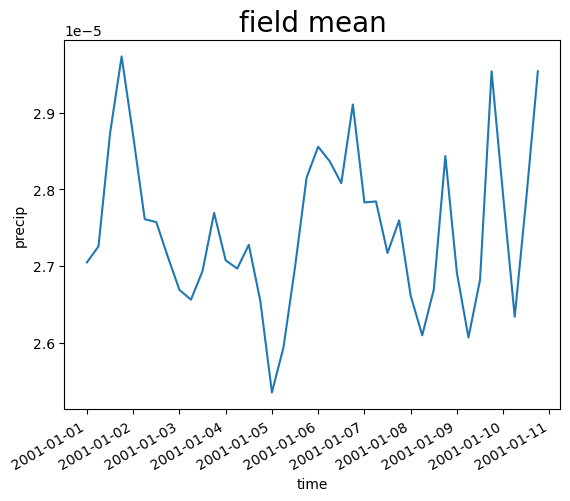

In [87]:
# 5.

ax = plt.axes()
ds2fm.plot(ax=ax);
ax.set_title('field mean', loc='center', fontsize = 20);

----

# Advanced Xarray Example: Climatology 

For our next example, we use a historical and scenario global time series from CMIP6.

In [88]:
dir_data  = "../data/"
# historical data
fnameh = "hist_em_LR_temp_subset_1980-2000.nc"
# scenario data
fname  = "ssp245_em_LR_temp_1995-2100.nc"

### Extract some time period

First, we extract a 20-year time range (1980-2000).

In [89]:
dsh = xr.open_dataset(dir_data + fnameh)
dsh

FileNotFoundError: [Errno 2] No such file or directory: '/home/k/k204232/tmp/PythonCourse_material_202310/data/hist_em_LR_temp_subset_1980-2000.nc'

### Compute monthly means

Xarray allows us to group the time steps monthly-wise with the `groupby` method and compute the monthly means. 

In [ ]:
clim_xr = dsh.groupby('time.month').mean()   #cdo ymonmean

In [ ]:
clim_xr


### Compute the area weights
To account for the different grid cell sizes, we calculate the variable weighted this time.


In [ ]:
weights = np.cos(np.deg2rad(dsh.lat))

In [ ]:
weights

Compute the weighted data.

In [ ]:
clim_xr_wgt = clim_xr.weighted(weights)

In [ ]:
clim_xr_wgt

Compute the spatial mean.

In [ ]:
clim_xr_mean = clim_xr_wgt.mean(('lat','lon'))

In [ ]:
clim_xr_mean

### Plot the result.

In [ ]:
clim_xr_mean.tas.plot()

## Anomaly

Open the scenario file and extract the time range 2015-2100.

In [ ]:
ds = xr.open_dataset(dir_data + fname)
ds = ds.sel(time=slice('2015-01-01','2100-12-31'))

Compute the spatial mean of the weighted data.

In [ ]:
tas_xr_wgt = ds.tas.weighted(weights).mean(('lat','lon'))

Compute the anomaly. This is done by subtracting the monthly climatology from the monthly grouped data.

In [ ]:
anom_xr = tas_xr_wgt.groupby('time.month') - clim_xr_mean

Compute the yearly means.

In [ ]:
anom_xr_ymean = anom_xr.resample(time='Y').mean()

Plot the result.

In [ ]:
anom_xr_ymean.tas.plot()

<br>

----
----

See also:

- Project Pythia Computations and Masks with Xarray https://foundations.projectpythia.org/core/xarray/computation-masking.html
- Tutorials and Videos https://docs.xarray.dev/en/stable/tutorials-and-videos.html
- DKRZ tutorials https://data-infrastructure-services.gitlab-pages.dkrz.de/tutorials-and-use-cases/Tutorials.html
- Pangeo Xarray Tutorial http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html
- Copernicus https://ecmwf-projects.github.io/copernicus-training-c3s/reanalysis-climatology.html#anomaly-calculation
